<a href="https://colab.research.google.com/github/kumarisakshi10/LGM-task1/blob/main/Stock_market_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [36]:
csv_url = "https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv"
stk_df= pd.read_csv(csv_url)
stk_df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [37]:
stk_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  2035 non-null   object 
 1   Open                  2035 non-null   float64
 2   High                  2035 non-null   float64
 3   Low                   2035 non-null   float64
 4   Last                  2035 non-null   float64
 5   Close                 2035 non-null   float64
 6   Total Trade Quantity  2035 non-null   int64  
 7   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 127.3+ KB


In [38]:
stk_df.sort_values(by="Date",inplace=True)

In [39]:
stk_df.sort_values(by="Date",inplace=True)
stk_df.reset_index(inplace=True)
stk_df.head()


,index,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56
1,2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2,2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
3,2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
4,2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98


Text(0.5, 1.0, 'Stack Indexed View')

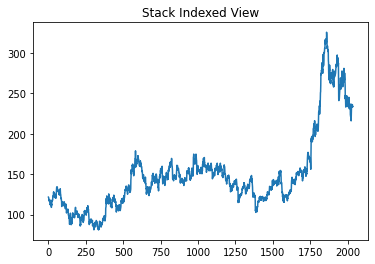

In [40]:
df1=stk_df['Close']
plt.plot(df1) 
plt.title("Stack Indexed View")

In [41]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))
print(df1)

[[0.16584967]
 [0.16319444]
 [0.1621732 ]
 ...
 [0.62622549]
 [0.62214052]
 [0.62418301]]


In [42]:
training_size=int(len(df1)*0.70)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [43]:
print(training_size)
print(test_size)

1424
611


In [44]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [45]:
# reshape into X=t,t+1,t+2,t+3 and Y =t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)
print(X_train.shape), print(y_train.shape)
print(X_test.shape), print(ytest.shape)

(1323, 100)
(1323,)
(510, 100)
(510,)


(None, None)

In [46]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_7 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_8 (LSTM)               (None, 50)                20200     
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [47]:
model.fit(X_train,y_train,validation_split=0.1,epochs=60,batch_size=64,verbose=1)

Epoch 1/60
19/19 [==============================] - 17s 257ms/step - loss: 0.0143 - val_loss: 0.0018
Epoch 2/60
19/19 [==============================] - 4s 186ms/step - loss: 0.0023 - val_loss: 0.0012
Epoch 3/60
19/19 [==============================] - 4s 185ms/step - loss: 9.8337e-04 - val_loss: 0.0013
Epoch 4/60
19/19 [==============================] - 4s 188ms/step - loss: 8.7366e-04 - val_loss: 0.0012
Epoch 5/60
19/19 [==============================] - 3s 184ms/step - loss: 8.3909e-04 - val_loss: 0.0012
Epoch 6/60
19/19 [==============================] - 4s 187ms/step - loss: 8.5943e-04 - val_loss: 0.0011
Epoch 7/60
19/19 [==============================] - 4s 187ms/step - loss: 8.0169e-04 - val_loss: 0.0011
Epoch 8/60
19/19 [==============================] - 4s 189ms/step - loss: 7.7177e-04 - val_loss: 0.0011
Epoch 9/60
19/19 [==============================] - 4s 186ms/step - loss: 7.5186e-04 - val_loss: 0.0011
Epoch 10/60
19/19 [==============================] - 4s 186ms/step - lo

In [48]:
model.fit(X_train,y_train,validation_split=0.1,epochs=60,batch_size=64,verbose=1)

Epoch 1/60
19/19 [==============================] - 4s 190ms/step - loss: 1.9053e-04 - val_loss: 1.7277e-04
Epoch 2/60
19/19 [==============================] - 4s 188ms/step - loss: 1.8989e-04 - val_loss: 1.6720e-04
Epoch 3/60
19/19 [==============================] - 4s 186ms/step - loss: 1.7984e-04 - val_loss: 1.5707e-04
Epoch 4/60
19/19 [==============================] - 4s 188ms/step - loss: 1.7902e-04 - val_loss: 1.6987e-04
Epoch 5/60
19/19 [==============================] - 4s 188ms/step - loss: 1.8237e-04 - val_loss: 1.7118e-04
Epoch 6/60
19/19 [==============================] - 4s 188ms/step - loss: 1.8456e-04 - val_loss: 1.6188e-04
Epoch 7/60
19/19 [==============================] - 4s 189ms/step - loss: 1.8404e-04 - val_loss: 1.6928e-04
Epoch 8/60
19/19 [==============================] - 4s 189ms/step - loss: 1.7729e-04 - val_loss: 2.3877e-04
Epoch 9/60
19/19 [==============================] - 4s 188ms/step - loss: 1.9203e-04 - val_loss: 1.4251e-04
Epoch 10/60
19/19 [=========